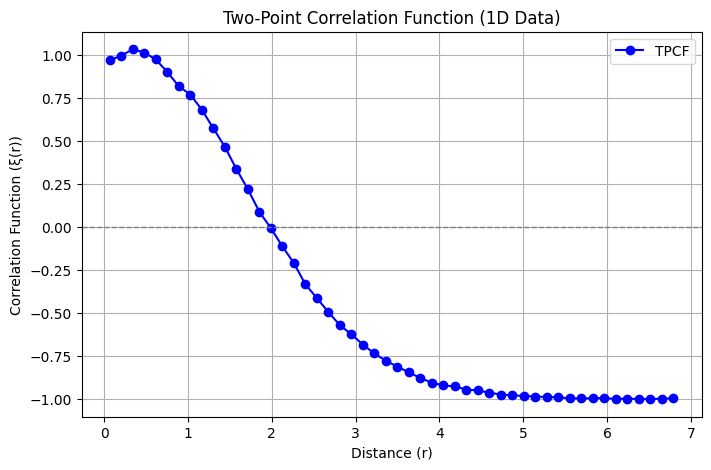

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the 1D dataset
data_1d = np.loadtxt('1d_data.txt')

# Define parameters for the correlation function
num_bins = 50
min_distance = 0.0
max_distance = np.ptp(data_1d)  # Peak-to-peak range of the data

# Create histogram bins
bins = np.linspace(min_distance, max_distance, num_bins + 1)
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# Calculate DD(r)
DD_counts = np.zeros(num_bins)
n_points = len(data_1d)

for i in range(n_points):
    for j in range(i + 1, n_points):  # Avoid double-counting pairs
        distance = abs(data_1d[i] - data_1d[j])
        bin_index = np.digitize(distance, bins) - 1
        if 0 <= bin_index < num_bins:
            DD_counts[bin_index] += 1

# Generate a random distribution for RR(r)
random_sample = np.random.uniform(np.min(data_1d), np.max(data_1d), n_points)
RR_counts = np.zeros(num_bins)

for i in range(n_points):
    for j in range(i + 1, n_points):  # Avoid double-counting pairs
        distance = abs(random_sample[i] - random_sample[j])
        bin_index = np.digitize(distance, bins) - 1
        if 0 <= bin_index < num_bins:
            RR_counts[bin_index] += 1

# Calculate the TPCF
RR_counts[RR_counts == 0] = np.nan  # Avoid division by zero
TPCF = DD_counts / RR_counts - 1

# Plot the TPCF
plt.figure(figsize=(8, 5))
plt.plot(bin_centers, TPCF, label='TPCF', marker='o', linestyle='-', color='b')
plt.xlabel('Distance (r)')
plt.ylabel('Correlation Function (ξ(r))')
plt.title('Two-Point Correlation Function (1D Data)')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.grid()
plt.legend()
plt.show()


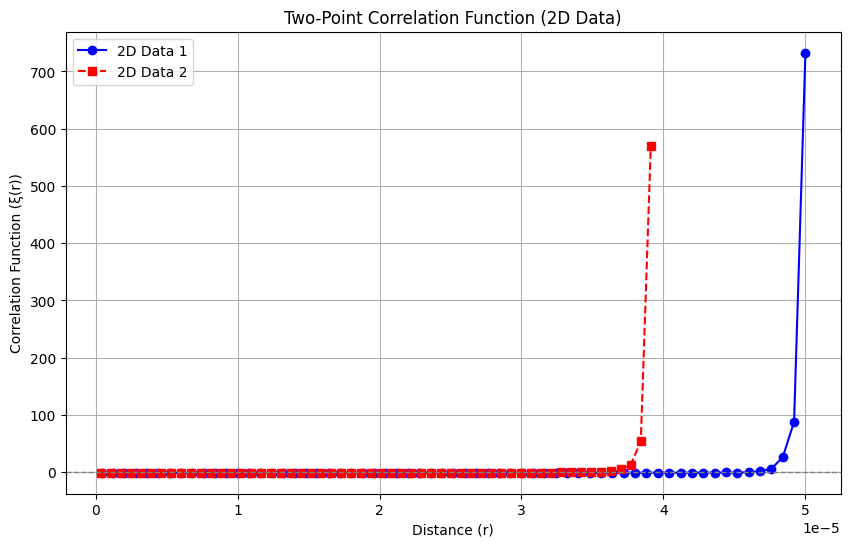

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def compute_tpcf_2d(data, num_bins=100, random_sample_size=4000):
    """
    Computes the two-point correlation function (TPCF) for 2D data using the natural estimator.
    
    Parameters:
        data (numpy.ndarray): Array of shape (N, 2), where each row is a 2D point.
        num_bins (int): Number of bins for distance.
        random_sample_size (int): Number of random points to generate.
    
    Returns:
        bin_centers (numpy.ndarray): The center of each distance bin.
        tpcf (numpy.ndarray): The computed TPCF values for each bin.
    """
    # Define bins for distances
    min_distance = 0.0
    max_distance = np.sqrt(2) * np.ptp(data)  # Diagonal of the bounding box
    bins = np.linspace(min_distance, max_distance, num_bins + 1)
    bin_centers = 0.5 * (bins[:-1] + bins[1:])

    # Count DD(r)
    n_points = len(data)
    DD_counts = np.zeros(num_bins)
    for i in range(n_points):
        for j in range(i + 1, n_points):  # Avoid double-counting pairs
            distance = np.linalg.norm(data[i] - data[j])  # Euclidean distance
            bin_index = np.digitize(distance, bins) - 1
            if 0 <= bin_index < num_bins:
                DD_counts[bin_index] += 1

    # Generate random points
    random_x = np.random.uniform(np.min(data[:, 0]), np.max(data[:, 0]), random_sample_size)
    random_y = np.random.uniform(np.min(data[:, 1]), np.max(data[:, 1]), random_sample_size)
    random_sample = np.column_stack((random_x, random_y))

    # Count RR(r)
    RR_counts = np.zeros(num_bins)
    for i in range(random_sample_size):
        for j in range(i + 1, random_sample_size):  # Avoid double-counting pairs
            distance = np.linalg.norm(random_sample[i] - random_sample[j])  # Euclidean distance
            bin_index = np.digitize(distance, bins) - 1
            if 0 <= bin_index < num_bins:
                RR_counts[bin_index] += 1

    # Compute TPCF
    
    DD_total_pairs = n_points * (n_points - 1) / 2
    RR_total_pairs = random_sample_size * (random_sample_size - 1) / 2
    
    RR_counts[RR_counts == 0] = np.nan  # Avoid division by zero
    
    
    RR_counts = RR_counts * (DD_total_pairs / RR_total_pairs)  # Normalize RR_counts
    
    tpcf = DD_counts / RR_counts - 1

    return bin_centers, tpcf

# Load the 2D datasets
data_1 = np.loadtxt("2d_data.txt")
data_2 = np.loadtxt("2d_datab.txt")

sample_size_1 = len(data_1)
sample_size_2 = len(data_2)


# Compute TPCF for both datasets
bin_centers_1, tpcf_1 = compute_tpcf_2d(data_1)
bin_centers_2, tpcf_2 = compute_tpcf_2d(data_2)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(bin_centers_1, tpcf_1, label='2D Data 1', marker='o', linestyle='-', color='b')
plt.plot(bin_centers_2, tpcf_2, label='2D Data 2', marker='s', linestyle='--', color='r')
plt.xlabel('Distance (r)')
plt.ylabel('Correlation Function (ξ(r))')
plt.title('Two-Point Correlation Function (2D Data)')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.grid()
plt.legend()
plt.show()
